In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.__version__

'2.3.2'

In [3]:
# !wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

## Read the dataset

In [4]:
car_df = pd.read_csv('../01-intro/car_fuel_efficiency.csv')
print(car_df.shape[0])

9704


In [5]:
car_df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


## Prepare the dataset
Use only the following columns:

'engine_displacement',
'horsepower',
'vehicle_weight',
'model_year',
'fuel_efficiency_mpg'

In [6]:
base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']
features = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']
car_df = car_df[base].copy()
car_df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


## EDA

In [7]:
car_df['fuel_efficiency_mpg'].describe()

count    9704.000000
mean       14.985243
std         2.556468
min         6.200971
25%        13.267459
50%        15.006037
75%        16.707965
max        25.967222
Name: fuel_efficiency_mpg, dtype: float64

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

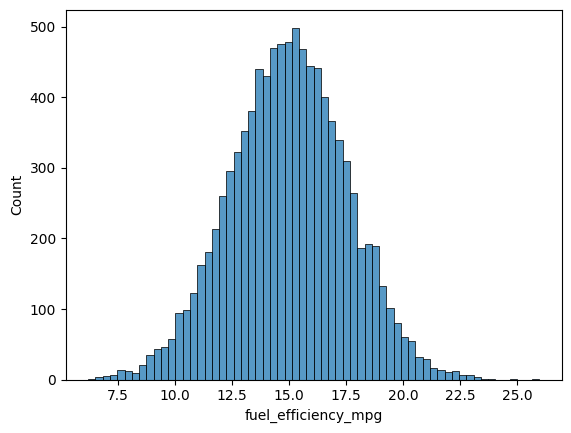

In [8]:
sns.histplot(car_df['fuel_efficiency_mpg'])
# this variable doesn't have a long tail. It looks to be pretty normally distributed

## Question 1
There's one column with missing values. What is it?

'engine_displacement'
'horsepower'
'vehicle_weight'
'model_year'

In [9]:
print(f'Q1. Variable with missing value:\n{car_df.isnull().sum()}')
# Horsepower

Q1. Variable with missing value:
engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64


## Question 2
What's the median (50% percentile) for variable 'horsepower'?

In [10]:
print(f'Q2. Stats on horsepower:\n\n{car_df["horsepower"].describe()}\n')
print(f'Median horsepower: {car_df["horsepower"].describe()["50%"]}') #149

Q2. Stats on horsepower:

count    8996.000000
mean      149.657292
std        29.879555
min        37.000000
25%       130.000000
50%       149.000000
75%       170.000000
max       271.000000
Name: horsepower, dtype: float64

Median horsepower: 149.0


## Prepare and split the dataset
Shuffle the dataset (the filtered one you created above), use seed 42.
Split your data in train/val/test sets, with 60%/20%/20% distribution.

In [11]:
n = len(car_df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
print(n_train/n, n_val/n, n_test/n)

0.6001648804616653 0.19991755976916736 0.19991755976916736


In [12]:
# shuffle the indices
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_train = car_df.iloc[idx[:n_train]]
df_val = car_df.iloc[idx[n_train:n_train+n_val]]
df_test = car_df.iloc[idx[n_train+n_val:]]

len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

In [13]:
car_df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


In [14]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

print(len(df_train), len(df_val), len(df_test))

5824 1940 1940


In [15]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

## Functions

In [16]:
def prepare_X(df, features, na_fill_val):
    df_num = df[features].copy()
    df_num = df_num.fillna(na_fill_val)
    X = df_num.values
    return X

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]


def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]
    
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

## Question 3

- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

In [17]:
features

['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

In [18]:
# with 0 value for fillna
X_train = prepare_X(df=df_train, features=features, na_fill_val=0)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df=df_val, features=features, na_fill_val=0)
y_pred = w0 + X_val.dot(w)
model1_rmse = rmse(y_val, y_pred)
print(f'Rmse: {model1_rmse}')

Rmse: 0.5173782638841655


In [19]:
# with mean value for fillna
mean_hp_train = df_train['horsepower'].mean()
print(f'Mean Horspower (train dataset): {mean_hp_train}')
X_train = prepare_X(df=df_train, features=features, na_fill_val=mean_hp_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df=df_val, features=features, na_fill_val=mean_hp_train)
y_pred = w0 + X_val.dot(w)
model2_rmse = rmse(y_val, y_pred)
print(f'Rmse: {model2_rmse}')
print(f'Difference between model1 and model2 rmse: {model1_rmse-model2_rmse}')

Mean Horspower (train dataset): 149.54476367006487
Rmse: 0.46359650423320226
Difference between model1 and model2 rmse: 0.05378175965096327


## Question 4
- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?
- If multiple options give the same best RMSE, select the smallest r.
- Options:
  - 0
  - 0.01
  - 1
  - 10
  - 100

In [20]:
# with 0 value for fillna
X_train = prepare_X(df=df_train, features=features, na_fill_val=0)

for rval in [0, 0.01, 1, 10, 100]:
    w0, w = train_linear_regression_reg(X_train, y_train, r=rval)
    X_val = prepare_X(df=df_val, features=features, na_fill_val=0)
    y_pred = w0 + X_val.dot(w)
    model_rmse = rmse(y_val, y_pred)
    print(f'Rmse with r={rval}: {round(model_rmse, 2)}')

# r=0 gives the best rmse.

Rmse with r=0: 0.52
Rmse with r=0.01: 0.52
Rmse with r=1: 0.52
Rmse with r=10: 0.52
Rmse with r=100: 0.52


## Question 5
We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))
- What's the value of std?
  - 0.001
  - 0.006
  - 0.060
  - 0.600
- Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

In [21]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
all_rmse_scores = []
for s in seeds:
    # prepare the dataset
    idx = np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx)
    
    df_train = car_df.iloc[idx[:n_train]]
    df_val = car_df.iloc[idx[n_train:n_train+n_val]]
    df_test = car_df.iloc[idx[n_train+n_val:]]

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values


    X_train = prepare_X(df=df_train, features=features, na_fill_val=0)
    w0, w = train_linear_regression(X_train, y_train)
    X_val = prepare_X(df=df_val, features=features, na_fill_val=0)
    y_pred = w0 + X_val.dot(w)
    model_rmse = rmse(y_val, y_pred)
    all_rmse_scores.append(model_rmse)
    print(f'Seed {s}, rmse: {model_rmse}')
    
print(f'\nAll RMSE scores: {all_rmse_scores}\n\n')
print(f'Std Dev of RMSE scores: {round(np.std(all_rmse_scores), 3)}')

Seed 0, rmse: 0.5206531296280096
Seed 1, rmse: 0.5213388912854027
Seed 2, rmse: 0.5228069974702905
Seed 3, rmse: 0.5159516741065057
Seed 4, rmse: 0.5109129460122063
Seed 5, rmse: 0.5283406459953645
Seed 6, rmse: 0.5313910658172253
Seed 7, rmse: 0.5090670387375617
Seed 8, rmse: 0.5147399129158975
Seed 9, rmse: 0.5131865908294857

All RMSE scores: [np.float64(0.5206531296280096), np.float64(0.5213388912854027), np.float64(0.5228069974702905), np.float64(0.5159516741065057), np.float64(0.5109129460122063), np.float64(0.5283406459953645), np.float64(0.5313910658172253), np.float64(0.5090670387375617), np.float64(0.5147399129158975), np.float64(0.5131865908294857)]


Std Dev of RMSE scores: 0.007


## Question 6
- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?
- Options:
  - 0.15
  - 0.515
  - 5.15
  - 51.5

In [22]:
seed = 9

# prepare the dataset
idx = np.arange(n)
np.random.seed(s)
np.random.shuffle(idx)

df_train = car_df.iloc[idx[:n_train]]
df_val = car_df.iloc[idx[n_train:n_train+n_val]]
df_test = car_df.iloc[idx[n_train+n_val:]]

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values


df_full_train = pd.concat([df_train, df_val], axis=0)
df_full_train = df_full_train.reset_index(drop=True)

# train on train+val
X_full_train = prepare_X(df=df_full_train, features=features, na_fill_val=0)
y_full_train = np.concatenate([y_train, y_val])
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

# predict on test
X_test = prepare_X(df=df_test, features=features, na_fill_val=0)
y_pred = w0 + X_test.dot(w)
model_rmse = rmse(y_test, y_pred)
print(f'Seed {seed}, rmse: {model_rmse}')

Seed 9, rmse: 0.5156261299166541
